In [1]:
import json
from pprint import pprint
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = json.load(open('book-review.json'))

In [6]:
twt = data['reviews'][1]['text']

In [7]:
twt

'the text reveals the mentality of the CIA so that it reveals the group think which is necessary for understanding its philosophical shallowness'

In [8]:
tweet_index = []
tweet_date = []
positive_reviews = []
negative_reviews = []

In [9]:
tw_counter = 0
def analyze_local(sentence, tw_date):
    sid = SentimentIntensityAnalyzer()
    
    print(sentence)
    global tw_counter
    tw_counter += 1
    ss = sid.polarity_scores(sentence)
    print(ss['pos'])
    positive_reviews.append(ss['pos'])
    negative_reviews.append(-ss['neg'])    
    tweet_index.append(tw_counter)
    current_date = pd.to_datetime(tw_date).date()
    #print(current_date)
    tweet_date.append(current_date)
    
    '''
    for k in sorted(ss):
        #print(ss)
        print('{0}: {1}, '.format(k, ss[k]), end = '')
    '''

In [10]:
def plot_data():
    # evenly sampled time at 200ms intervals
    
    #myneglist = [ -x for x in negative_reviews]

    # red dashes, blue squares and green triangles
    plt.title('Sentiment Analysis : Positive (blue) and Negative (red)')
    plt.plot(tweet_date, positive_reviews, 'b--', tweet_date, negative_reviews, 'r--')
    #plt.plot(tweet_date, negative_reviews, 'r--')
    plt.show()

{'text': 'Much too concerned with the structure and functions of the CIA and not with the crentral theme suggested by the title.', 'created_at': 'Mon Jan 01 13:37:52 +0000 2018'}
Much too concerned with the structure and functions of the CIA and not with the crentral theme suggested by the title.
0.0
the text reveals the mentality of the CIA so that it reveals the group think which is necessary for understanding its philosophical shallowness
0.0
The book is what I expected to be and more....now I have confirmation. Should I believe what I read........this is another question which the reader can only answer for his / her self. The world which we all live in has many twists on the truth and lies about everything....obviously our actions may they be positive or negative will be definitely affecting the out come of our lives. The book is worth reading as far has I'm concerned.
0.125
I guess a gag order is a gag order. I was disappointed with this book. There wasn't anything in it that you

/Users/rajacsp/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


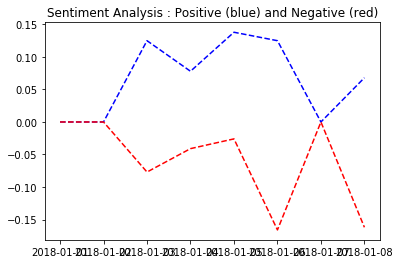

In [11]:
print(data['reviews'][0])    

total_reviews = len(data['reviews'])
for x in range(total_reviews):
    analyze_local(data['reviews'][x]['text'], data['reviews'][x]['created_at'])

plot_data() 